# Visualización interactiva de cambios climáticos

Este cuaderno demuestra el análisis y la visualización interactiva de los cambios climáticos utilizando datos históricos de temperaturas globales. Se siguen las siguientes etapas:

1. Carga de datos.
2. Limpieza de datos.
3. Estandarización y preprocesamiento.
4. Visualización interactiva con Plotly.

---

# Cambio Climático: Datos de Temperatura Superficial de la Tierra

## Acerca del Conjunto de Datos

Algunos dicen que el cambio climático es la mayor amenaza de nuestra era, mientras que otros afirman que es un mito basado en una ciencia cuestionable.

Más que con otros conjuntos de datos destacados por Kaggle, existe una enorme cantidad de limpieza y preparación de datos involucrada en la compilación de un estudio a largo plazo sobre las tendencias climáticas. Los datos tempranos fueron recolectados por técnicos utilizando termómetros de mercurio, donde cualquier variación en el horario de las mediciones impactaba los resultados. En la década de 1940, la construcción de aeropuertos provocó el traslado de muchas estaciones meteorológicas. En la década de 1980, se adoptaron termómetros electrónicos que, según se informa, tienen un sesgo hacia valores más bajos de temperatura.

Dada esta complejidad, existen varias organizaciones que recopilan datos sobre tendencias climáticas. Los tres conjuntos de datos más citados sobre temperaturas terrestres y oceánicas son: MLOST de NOAA, GISTEMP de NASA y HadCrut del Reino Unido.

Hemos reempaquetado los datos a partir de una compilación más reciente elaborada por Berkeley Earth, una organización afiliada al Lawrence Berkeley National Laboratory. El estudio Berkeley Earth Surface Temperature Study combina 1.6 mil millones de reportes de temperatura provenientes de 16 archivos preexistentes. Este conjunto está bien estructurado y permite dividirse en subconjuntos interesantes (por ejemplo, por país). Publican tanto los datos originales como el código de las transformaciones que aplicaron. Además, emplean métodos que permiten incluir observaciones climáticas de series de tiempo más cortas, reduciendo la cantidad de datos que deben ser descartados.

En este conjunto de datos, hemos incluido varios archivos:

Temperaturas globales de tierra y océano (GlobalTemperatures.csv):
Date: comienza en 1750 para temperaturas terrestres promedio, y en 1850 para temperaturas máximas y mínimas, así como para temperaturas globales de tierra y océano.
- LandAverageTemperature: temperatura terrestre promedio global en grados Celsius.
- LandAverageTemperatureUncertainty: intervalo de confianza del 95 % alrededor de la temperatura promedio.
- LandMaxTemperature: temperatura máxima terrestre promedio global en grados Celsius.
- LandMaxTemperatureUncertainty: intervalo de confianza del 95 % alrededor de la temperatura máxima terrestre.
- LandMinTemperature: temperatura mínima terrestre promedio global en grados Celsius.
- LandMinTemperatureUncertainty: intervalo de confianza del 95 % alrededor de la temperatura mínima terrestre.
- LandAndOceanAverageTemperature: temperatura promedio global de tierra y océano en grados Celsius.
- LandAndOceanAverageTemperatureUncertainty: intervalo de confianza del 95 % alrededor de la temperatura promedio global de tierra y océano.

Otros archivos incluidos:
- GlobalLandTemperaturesByCountry.csv: temperatura terrestre promedio global por país.
- GlobalLandTemperaturesByState.csv: temperatura terrestre promedio global por estado.
- GlobalLandTemperaturesByMajorCity.csv: temperatura terrestre promedio global por ciudades principales.
- GlobalLandTemperaturesByCity.csv: temperatura terrestre promedio global por ciudad.

Los datos originales provienen de la página de datos de Berkeley Earth.

# Instalación de librerias 

In [ ]:
# instalacion de librerias utilizadas
%pip install pandas matplotlib seaborn scikit-learn
%pip install numpy
%pip install scipy

In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Carga de Datos

### Para descarga de la base de datos: 
Fuente https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/data

In [3]:
# #  Cargar los datos desde la fuente
# %pip install kagglehub
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

# print("Path to dataset files:", path)

100%|██████████| 84.7M/84.7M [00:26<00:00, 3.35MB/s]


Extracting files...
Path to dataset files: C:\Users\frany\.cache\kagglehub\datasets\berkeleyearth\climate-change-earth-surface-temperature-data\versions\2


In [2]:
Path = 'data/'
# Cargar los archivos CSV
# city_data = pd.read_csv('GlobalLandTemperaturesByCity.csv')
country_data = pd.read_csv(Path+'GlobalLandTemperaturesByCountry.csv')
major_city_data = pd.read_csv(Path+'GlobalLandTemperaturesByMajorCity.csv')
state_data = pd.read_csv(Path+'GlobalLandTemperaturesByState.csv')
global_data = pd.read_csv(Path+'GlobalTemperatures.csv')


In [3]:
# Mostrar las primeras filas de cada dataframe
# print("City Data:")
# display(city_data.head())

print("Country Data:")
display(country_data.head())

print("Major City Data:")
display(major_city_data.head())

print("State Data:")
display(state_data.head())

print("Global Data:")
display(global_data.head())

Country Data:


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Major City Data:


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


State Data:


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


Global Data:


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# Estandarización de la información y de los campos

In [4]:

# Convertir las columnas 'dt' a tipo datetime
# city_data['dt'] = pd.to_datetime(city_data['dt'])
country_data['dt'] = pd.to_datetime(country_data['dt'])
major_city_data['dt'] = pd.to_datetime(major_city_data['dt'])
state_data['dt'] = pd.to_datetime(state_data['dt'])
global_data['dt'] = pd.to_datetime(global_data['dt'])

# Estandarización de las columnas de temperatura
scaler = StandardScaler()

# Establecer las columnas que vamos a estandarizar
temperature_columns = ['AverageTemperature', 'AverageTemperatureUncertainty', 
                       'LandAverageTemperature', 'LandMaxTemperature', 
                       'LandMinTemperature', 'LandAndOceanAverageTemperature']

# Aplicar estandarización
# city_data['StandardizedTemperature'] = scaler.fit_transform(city_data[['AverageTemperature']])
major_city_data['StandardizedTemperature'] = scaler.fit_transform(major_city_data[['AverageTemperature']])
state_data['StandardizedTemperature'] = scaler.fit_transform(state_data[['AverageTemperature']])
global_data['StandardizedLandTemperature'] = scaler.fit_transform(global_data[['LandAverageTemperature']])



# Visualización de los datos

In [ ]:
# Visualización de las temperaturas promedio por año para 'City'
# plt.figure(figsize=(10,6))
# city_data.groupby(city_data['dt'].dt.year)['AverageTemperature'].mean().plot()
# plt.title('Average Temperature per Year (City Data)', fontsize=16)
# plt.xlabel('Year')
# plt.ylabel('Average Temperature')
# plt.grid(True)
# plt.show()



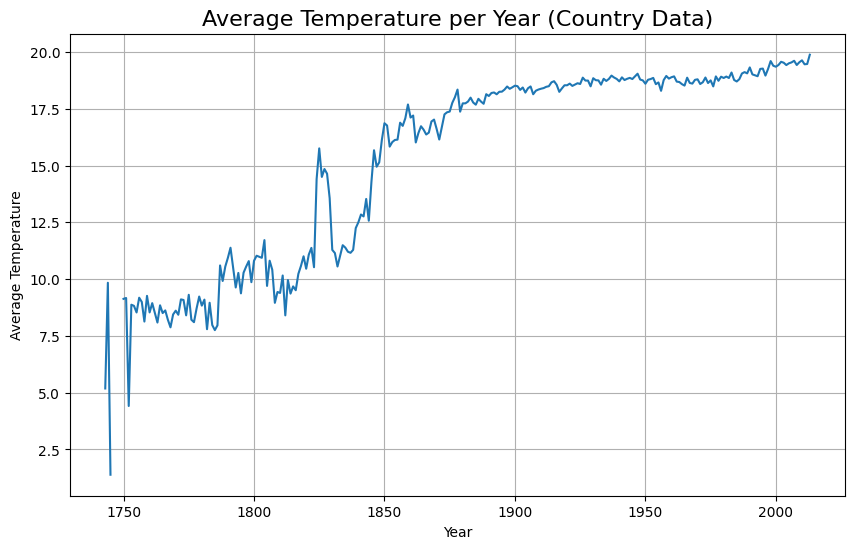

In [5]:

# Visualización de la temperatura promedio por país
plt.figure(figsize=(10,6))
country_data.groupby(country_data['dt'].dt.year)['AverageTemperature'].mean().plot()
plt.title('Average Temperature per Year (Country Data)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

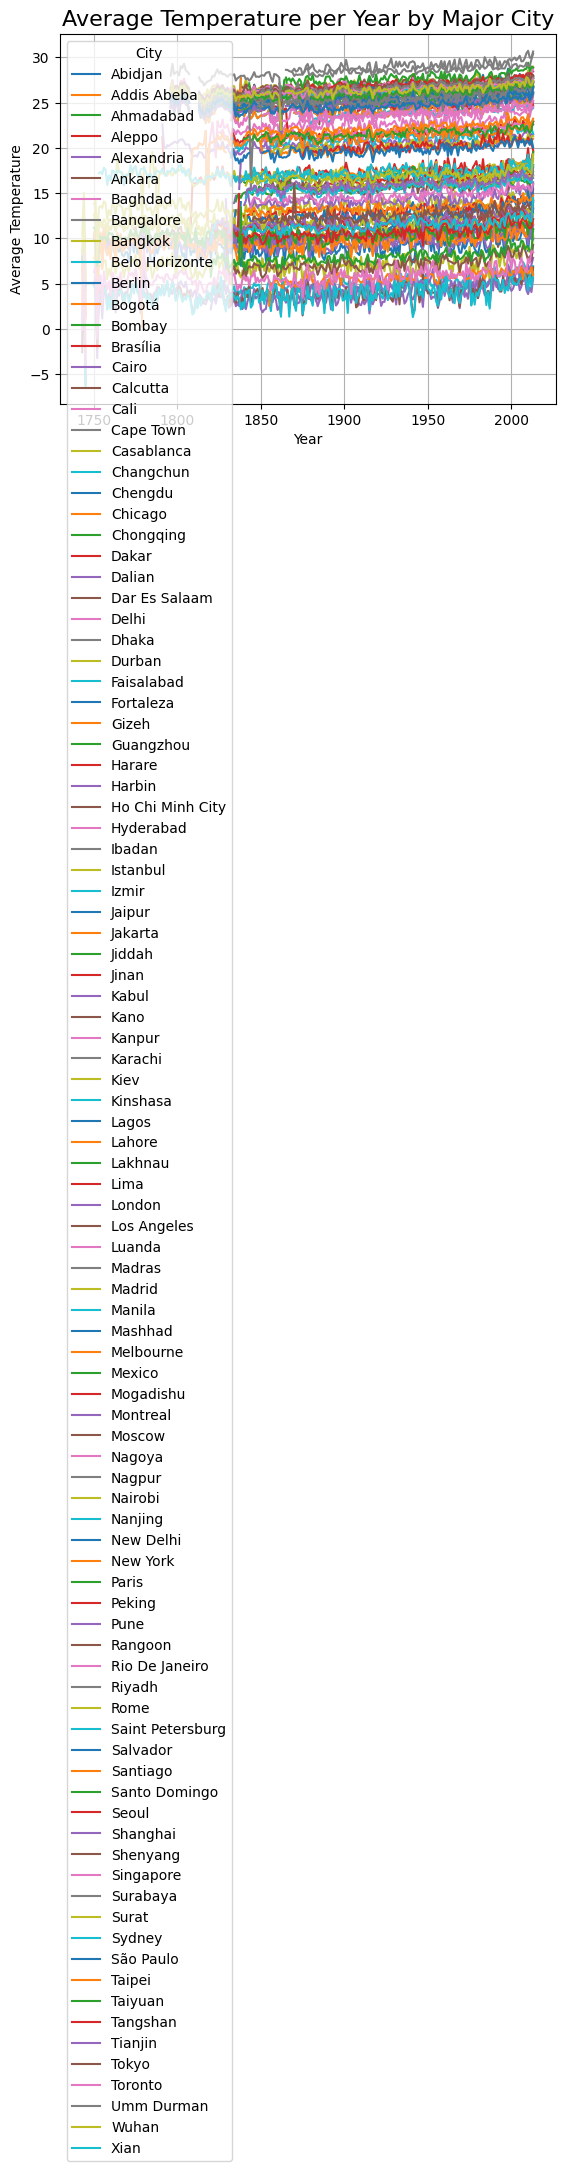

In [6]:

# Visualización comparativa entre diferentes ciudades principales
plt.figure(figsize=(12,6))
major_city_data.groupby([major_city_data['dt'].dt.year, 'City'])['AverageTemperature'].mean().unstack().plot()
plt.title('Average Temperature per Year by Major City', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()


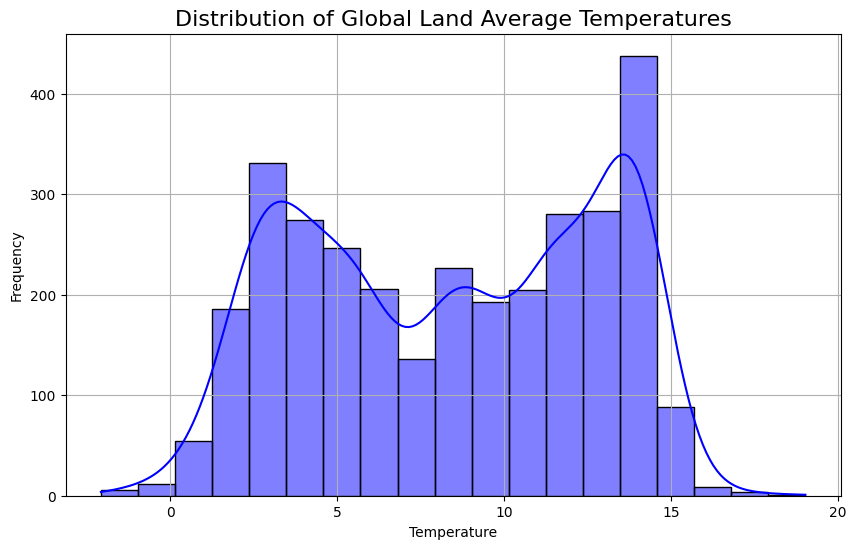

In [7]:

# Histograma de la distribución de las temperaturas globales
plt.figure(figsize=(10,6))
sns.histplot(global_data['LandAverageTemperature'], kde=True, color='blue')
plt.title('Distribution of Global Land Average Temperatures', fontsize=16)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


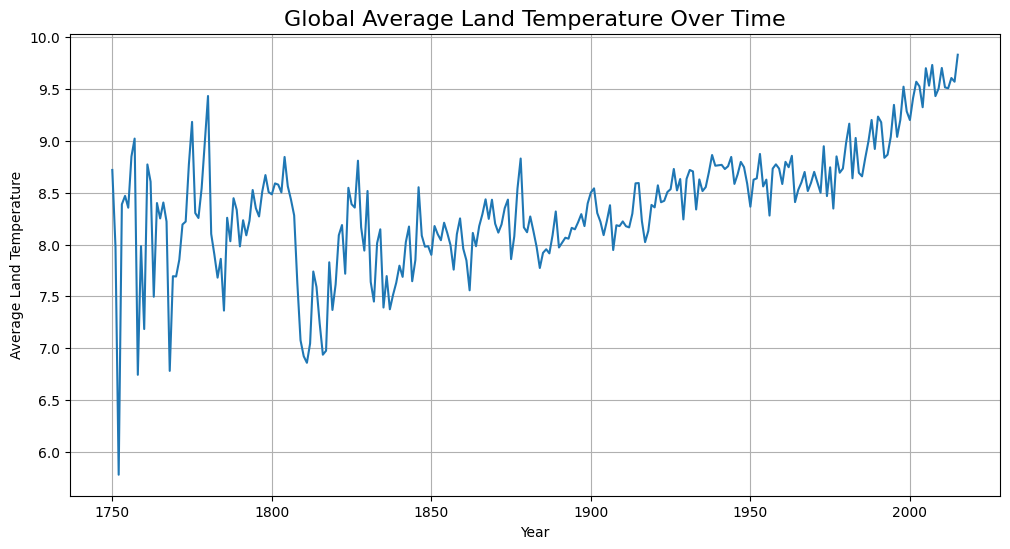

In [8]:

# Visualización de la tendencia de las temperaturas globales
plt.figure(figsize=(12,6))
global_data.groupby(global_data['dt'].dt.year)['LandAverageTemperature'].mean().plot()
plt.title('Global Average Land Temperature Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Land Temperature')
plt.grid(True)
plt.show()


In [10]:

# Mostrar información general de los datasets después de la estandarización
# print("City Data with Standardized Temperature:")
# display(city_data.head())

print("Major City Data with Standardized Temperature:")
display(major_city_data.head())

print("Global Data with Standardized Land Temperature:")
display(global_data.head())

Major City Data with Standardized Temperature:


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,StandardizedTemperature
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,0.855683
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,0.928502
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,0.995038
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,0.799422
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,0.728299


Global Data with Standardized Land Temperature:


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,StandardizedLandTemperature
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,-1.219172
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,-1.207987
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,-0.627475
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,0.026313
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,0.730095
